# data

In [103]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (20, 5)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   time            600 non-null    int64  
 4   screening_rat   600 non-null    object 
 5   director        600 non-null    object 
 6   dir_prev_bfnum  270 non-null    float64
 7   dir_prev_num    600 non-null    int64  
 8   num_staff       600 non-null    int64  
 9   num_actor       600 non-null    int64  
 10  box_off_num     600 non-null    int64  
 11  year            600 non-null    float64
 12  month           600 non-null    float64
 13  day             600 non-null    float64
 14  log_num         600 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 70.4+ KB


In [105]:
data = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')
data.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [106]:
for idx in range(len(data)) : 
    release_split = data.loc[idx, 'release_time'].split('-')
    data.loc[idx,'year'] = np.int(release_split[0])
    data.loc[idx, 'month'] = np.int(release_split[1])
    data.loc[idx, 'day'] = np.int(release_split[2])
    
for idx in range(len(test)) : 
    release_split = test.loc[idx, 'release_time'].split('-')
    test.loc[idx,'year'] = np.int(release_split[0])
    test.loc[idx, 'month'] = np.int(release_split[1])
    test.loc[idx, 'day'] = np.int(release_split[2])

In [107]:
data

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month,day
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012.0,11.0,22.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015.0,11.0,19.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013.0,6.0,5.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012.0,7.0,12.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091,2014.0,8.0,13.0
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438,2013.0,3.0,14.0
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475,2010.0,9.0,30.0
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525,2015.0,5.0,14.0


In [108]:
data.drop('release_time', axis = 1, inplace = True)
test.drop('release_time', axis = 1, inplace = True)

<AxesSubplot:xlabel='box_off_num', ylabel='Count'>

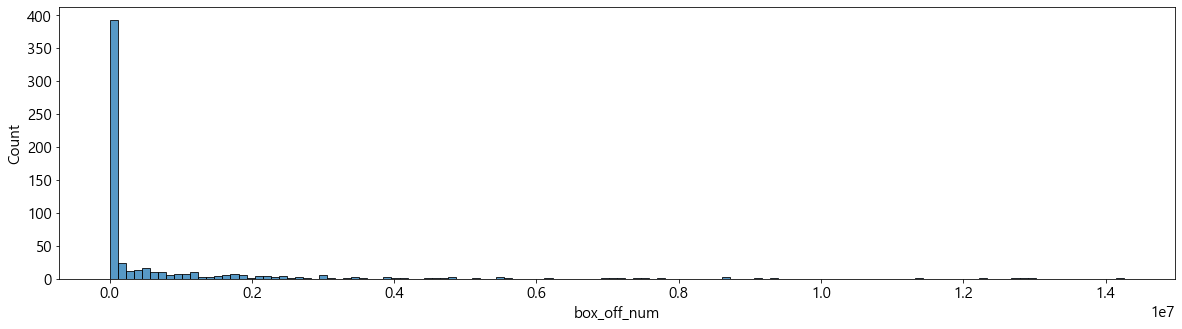

In [109]:
sns.histplot(x = 'box_off_num', data = data)

In [110]:
data['log_num'] = np.log1p(data['box_off_num'])

<AxesSubplot:xlabel='log_num', ylabel='Count'>

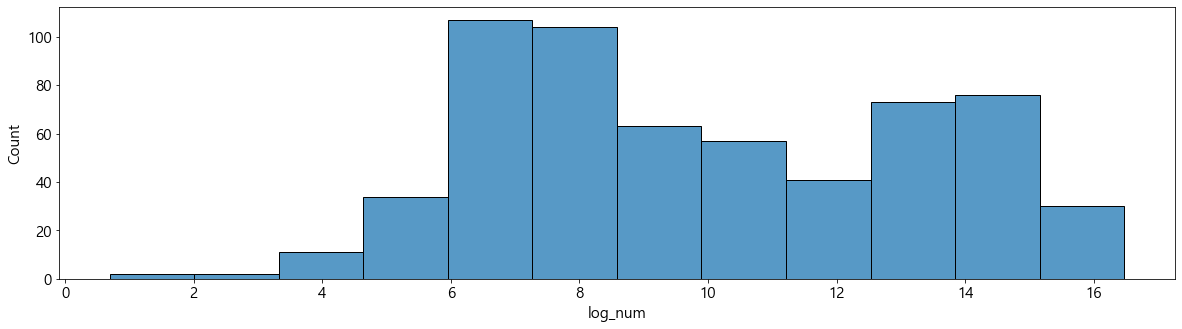

In [111]:
sns.histplot(x = 'log_num', data = data)

In [112]:
print('최다 관객 수 : ',data['box_off_num'].max())
print('관객 수 중앙값: ',data['box_off_num'].median())
print('관객 수 평균: ',data['box_off_num'].mean())
print('최소 관객 수 : ',data['box_off_num'].min())

최다 관객 수 :  14262766
관객 수 중앙값:  12591.0
관객 수 평균:  708181.7516666667
최소 관객 수 :  1


관객 수가 1인 영화?

In [113]:
data[data['box_off_num']> 1000000]

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month,day,log_num
1,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015.0,11.0,19.0,15.771725
2,은밀하게 위대하게,(주)쇼박스,액션,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013.0,6.0,5.0,15.755558
7,회사원,(주)쇼박스,액션,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523,2012.0,10.0,11.0,13.920343
16,써니,CJ E&M Pictures,코미디,124,15세 관람가,강형철,8223342.00,1,572,11,7453715,2011.0,5.0,4.0,15.824223
20,두근두근 내 인생,CJ 엔터테인먼트,드라마,117,12세 관람가,이재용,495068.50,2,466,3,1624573,2014.0,9.0,3.0,14.300756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,차이나타운,CGV아트하우스,느와르,110,청소년 관람불가,한준희,597497.00,3,420,3,1472147,2015.0,4.0,29.0,14.202233
595,해무,(주)NEW,드라마,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091,2014.0,8.0,13.0,14.204231
596,파파로티,(주)쇼박스,드라마,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438,2013.0,3.0,14.0,14.355762
598,악의 연대기,CJ 엔터테인먼트,느와르,102,15세 관람가,백운학,NaN,0,431,4,2192525,2015.0,5.0,14.0,14.600565


In [114]:
print('Q1 : ',np.percentile(data['box_off_num'], 25))
print('Q3 : ',np.percentile(data['box_off_num'], 75))


Q1 :  1297.25
Q3 :  479886.75


## missing 

In [115]:
data.isnull().sum()

title               0
distributor         0
genre               0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
year                0
month               0
day                 0
log_num             0
dtype: int64

1. 감독이 이전에 제작에 참여했던 영화의 관객수 평균값이 NA 이면서, 
2. 감독이 이전에 제작에 참여했던 영화가 있는 경우

In [116]:
data[(data['dir_prev_bfnum'].isnull()) & (data['dir_prev_num']>0)]

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month,day,log_num


이전 작품 평균 관객 수가 NA인 경우 이전에 제작에 참여한 영화의 개수가 0임을 알 수 있다
> 0으로 대체

In [117]:
data['dir_prev_bfnum'] = data['dir_prev_bfnum'].fillna(0)
test['dir_prev_bfnum'] = test['dir_prev_bfnum'].fillna(0)

## 제목

In [118]:
# 제목은 unique하기 때문에 필요 없음 
data['title'].nunique()

600

In [119]:
#data.drop('title', axis = 1, inplace = True)

## 배급사

In [120]:
# 배급사
data['distributor'].nunique()

169

169개의 배급사가 있음 -> 배급사별 평균 관객 수는 차이가 있는지 검정

In [121]:
data['distributor'] = data['distributor'].str.replace('\(주\)', '')
data['distributor'] = data['distributor'].str.replace(' ', '')

test['distributor'] = test['distributor'].str.replace('\(주\)', '')
test['distributor'] = test['distributor'].str.replace(' ', '')

In [122]:
data['distributor'].unique()

array(['롯데엔터테인먼트', '쇼박스', 'NEW', '쇼박스미디어플렉스', '백두대간', '유니버설픽쳐스인터내셔널코리아',
       '두타연', '케이알씨지', '콘텐츠윙', '키노아이', '팝파트너스', 'CJE&M영화부문', '영화제작전원사',
       'CJE&MPictures', 'CGV무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ엔터테인먼트',
       'CGV아트하우스', '조이앤시네마', '인디플러그', '콘텐츠판다', '인디스토리', '팝엔터테인먼트',
       '시네마서비스', '웃기씨네', '영화사진진', '레인보우팩토리', '김기덕필름', 'CJCGV',
       '동국대학교충무로영상제작센터', 'BoXoo엔터테인먼트', '마운틴픽쳐스', '메가박스플러스엠', '골든타이드픽처스',
       '파이오니아21', '디씨드', '드림팩트엔터테인먼트', '시너지', '디마엔터테인먼트', '판다미디어',
       '스톰픽쳐스코리아', '예지림엔터테인먼트', '영화사조제', '보람엔터테인먼트', '시네마달', '노바엔터테인먼트',
       '패스파인더씨앤씨', '대명문화공장', '온비즈넷', 'KT&G상상마당', '무비꼴라쥬', '인벤트디',
       '씨네그루키다리이엔티', '스튜디오후크', '나이너스엔터테인먼트', 'THE픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션픽처스', '이스트스카이필름', '필라멘트픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴픽처스', '휘엔터테인먼트', '이십세기폭스코리아', '피터팬픽쳐스', '에스와이코마드', '더픽쳐스',
       '오퍼스픽쳐스', '고앤고필름', '사람과사람들', 'JK필름', '씨너스엔터테인먼트', 'KT', '싸이더스FNH',
       '프레인글로벌', '나우콘텐츠', '홀리가든', '브릿지웍스', '엣나인필름', '위더스필름', '에이원엔터테인먼트',
       'OAL(올)', 

In [123]:
# https://dacon.io/competitions/open/235536/codeshare/2721?page=1&dtype=recent

def get_dis(x) :
    if 'CJ' in x or 'CGV' in x :
        return 'CJ'
    elif '쇼박스' in x :
        return '쇼박스'
    elif 'SK' in x :
        return 'SK'
    elif '리틀빅픽' in x :
        return '리틀빅픽처스'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '에이원' in x :
        return '에이원'
    elif '마인스' in x :
        return '마인스'
    elif '마운틴픽' in x :
        return '마운틴픽처스'
    elif '디씨드' in x :
        return '디씨드'
    elif '드림팩트' in x :
        return '드림팩트'
    elif '메가박스' in x :
        return '메가박스'
    elif '마운틴' in x :
        return '마운틴'
    else :
        return x

In [124]:
data['distributor'] = data['distributor'].apply(get_dis) 
test['distributor'] = test['distributor'].apply(get_dis) 

In [125]:
box_off_num_by_distributor = data.groupby('distributor')['box_off_num'].median().sort_values(ascending = False)

In [126]:
box_off_num_by_distributor = box_off_num_by_distributor.to_frame().\
sort_values('box_off_num', ascending = False)
box_off_num_by_distributor

,box_off_num
distributor,
아이필름코퍼레이션,3117859.0
영구아트무비,2541603.0
쇼박스,2138560.0
이십세기폭스코리아,1422844.0
전망좋은영화사,1214237.0
...,...
나우콘텐츠,54.0
위드시네마,46.0
사람과사람들,42.0


In [127]:
dist_rank = box_off_num_by_distributor['box_off_num'].rank().astype(int)
dist_rank

distributor
아이필름코퍼레이션     147
영구아트무비        146
쇼박스           145
이십세기폭스코리아     144
전망좋은영화사       143
             ... 
나우콘텐츠           5
위드시네마           4
사람과사람들          3
고구마공작소          2
인피니티엔터테인먼트      1
Name: box_off_num, Length: 147, dtype: int32

In [128]:
data['dist_rank'] = [dist_rank[s].astype(int) if s in dist_rank else 0 for s in data['distributor']]
data.drop('distributor', axis = 1, inplace = True)

test['dist_rank'] = [dist_rank[s].astype(int) if s in dist_rank else 0 for s in test['distributor']]
test.drop('distributor', axis = 1, inplace = True)

## 장르

In [129]:
data.groupby('genre')['box_off_num'].mean()

genre
SF        1.788346e+06
공포        5.908325e+05
느와르       2.263695e+06
다큐멘터리     6.717226e+04
드라마       6.256898e+05
멜로/로맨스    4.259680e+05
뮤지컬       6.627000e+03
미스터리      5.275482e+05
서스펜스      8.261100e+04
애니메이션     1.819267e+05
액션        2.203974e+06
코미디       1.193914e+06
Name: box_off_num, dtype: float64

<AxesSubplot:xlabel='genre', ylabel='box_off_num'>

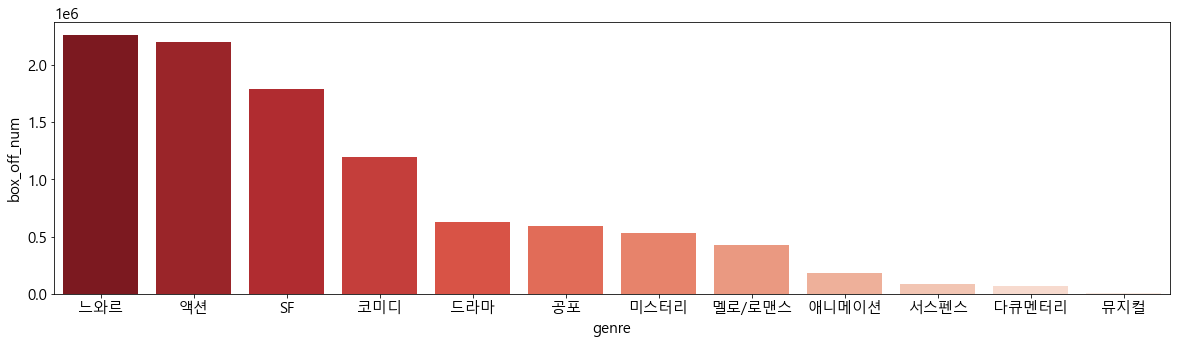

In [130]:
# 장르 
num_by_genre = data.groupby(['genre'])['box_off_num'].mean().\
to_frame().sort_values(by = 'box_off_num', ascending = False)
sns.barplot(x = num_by_genre.index, y = 'box_off_num',
            data = num_by_genre, palette = 'Reds_r')

In [131]:
num_by_genre['genre_rank'] = num_by_genre['box_off_num'].rank().astype(int)
num_by_genre

,box_off_num,genre_rank
genre,,
느와르,2.263695e+06,12
액션,2.203974e+06,11
SF,1.788346e+06,10
코미디,1.193914e+06,9
드라마,6.256898e+05,8
공포,5.908325e+05,7
미스터리,5.275482e+05,6
멜로/로맨스,4.259680e+05,5
애니메이션,1.819267e+05,4


In [132]:
data['genre_rank'] = [num_by_genre.loc[gen]['genre_rank'].astype(int) for gen in data['genre']]
test['genre_rank'] = [num_by_genre.loc[gen]['genre_rank'].astype(int) for gen in test['genre']]

In [133]:
data.drop('genre', axis = 1, inplace = True)
test.drop('genre', axis = 1, inplace = True)

## 상영시간

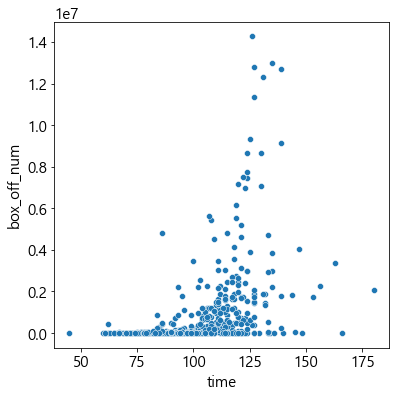

In [134]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'time', y = 'box_off_num', data = data)
plt.show()

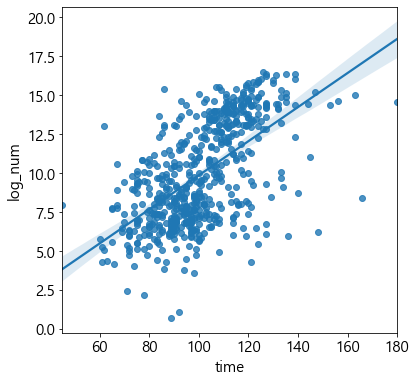

In [136]:
plt.figure(figsize = (6,6))
sns.regplot(x = 'time', y = 'log_num', data = data)
plt.show()

## 개봉일

<AxesSubplot:xlabel='year', ylabel='box_off_num'>

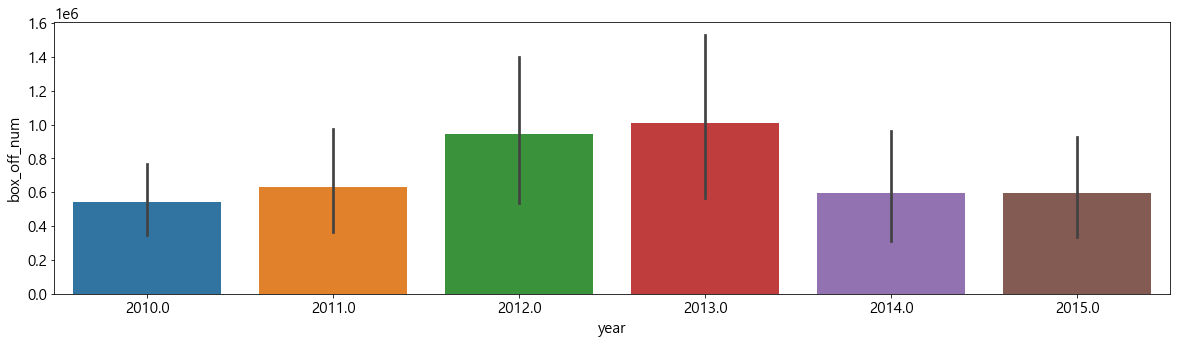

In [29]:
sns.barplot(x = 'year', y = 'box_off_num', data = data)

<AxesSubplot:xlabel='month', ylabel='box_off_num'>

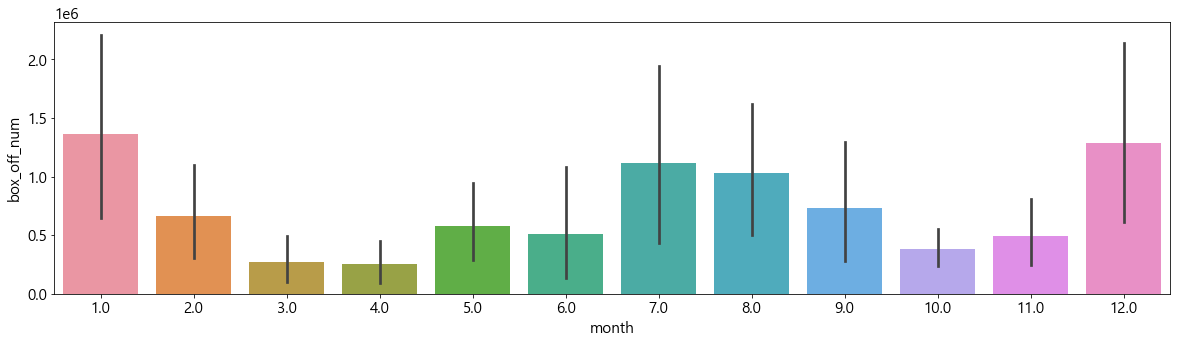

In [30]:
sns.barplot(x = 'month', y = 'box_off_num', data = data)

In [31]:
data['vacation'] = [1 if s in [1., 7., 8., 12.] else 0 for s in data['month']]
test['vacation'] = [1 if s in [1., 7., 8., 12.] else 0 for s in test['month']]

In [32]:
data.drop(['day'], axis = 1, inplace = True)
test.drop(['day'], axis = 1, inplace = True)

## 상영등급

<AxesSubplot:xlabel='box_off_num', ylabel='Density'>

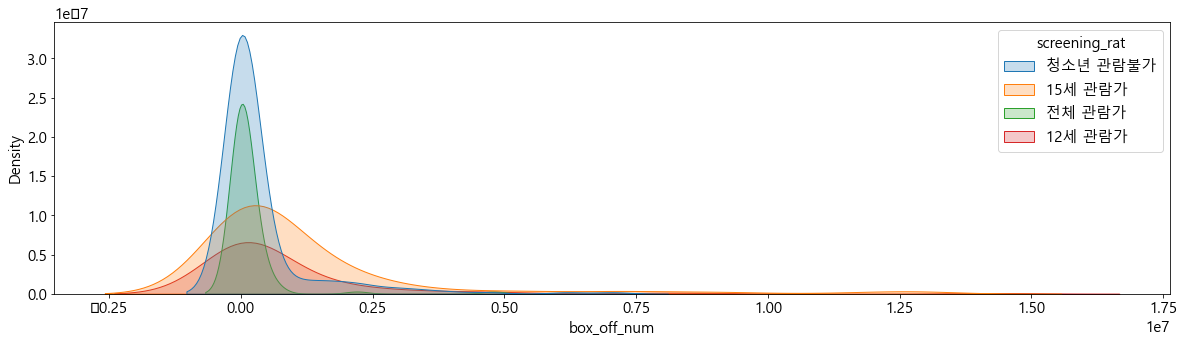

In [33]:
sns.kdeplot(x = 'box_off_num', hue = 'screening_rat',
            shade = True, data = data)

## 감독이름

In [139]:
director_over_50K = data.groupby(['director'])['dir_prev_bfnum'].mean() >= 10000
director_over_50K = director_over_50K[director_over_50K == True].index

In [140]:
director_over_50K

Index(['강우석', '강형철', '강효진', '경순', '계윤식', '고구마', '곽경택', '구자홍', '국동석', '권칠인',
       ...
       '한재림', '한종훈', '한준희', '허종호', '홍석재', '홍원찬', '홍지영', '황동혁', '황유식', '황인호'],
      dtype='object', name='director', length=172)

In [141]:
data['director_over_50K'] = [1 if s in director_over_50K else 0 for s in data['director']]
test['director_over_50K'] = [1 if s in director_over_50K else 0 for s in test['director']]

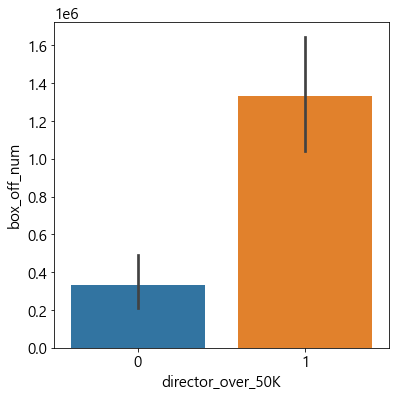

In [142]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'director_over_50K', y = 'box_off_num', data = data)
plt.show()

<AxesSubplot:xlabel='box_off_num', ylabel='Density'>

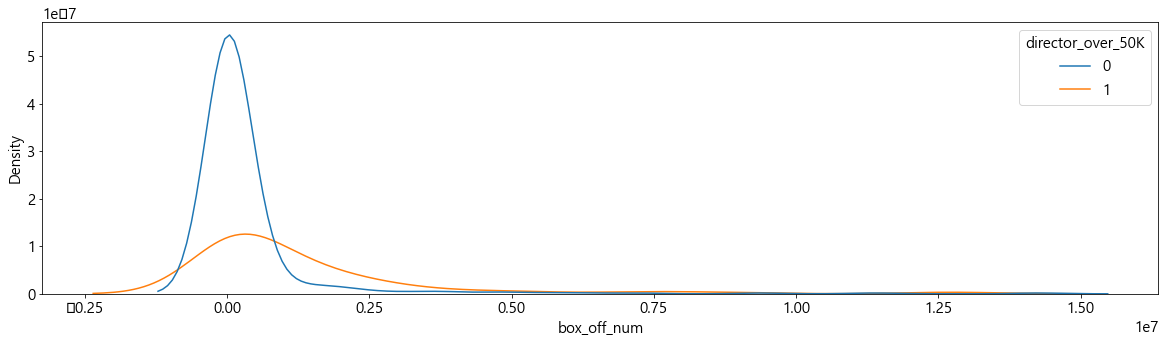

In [143]:
sns.kdeplot(x = 'box_off_num', hue = 'director_over_50K', data = data)

<AxesSubplot:xlabel='log_num', ylabel='Density'>

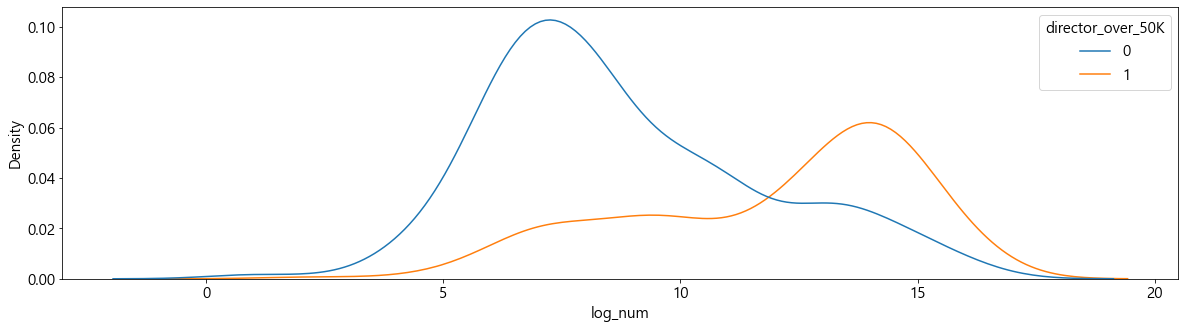

In [144]:
sns.kdeplot(x = 'log_num', hue = 'director_over_50K', data = data)

등분산성에 대한 귀무가설 기각 

In [149]:
from scipy.stats import bartlett
bartlett(data[data['director_over_50K'] == 0]['box_off_num'],
         data[data['director_over_50K'] == 1]['box_off_num'])

BartlettResult(statistic=91.40480895566843, pvalue=1.1709155464675876e-21)

In [150]:
from scipy.stats import ttest_ind
ttest_ind(data[data['director_over_50K'] == 0]['box_off_num'],
         data[data['director_over_50K'] == 1]['box_off_num'],
         equal_var = False)

Ttest_indResult(statistic=-5.928233317511703, pvalue=8.080688384463698e-09)

2번 이상 영화를 개봉한 감독과 1번 개봉한 감독의 관객 수에는 유의한 차이가 있음 

In [151]:
director_over_2times = data['director'].value_counts() >= 2
director_over_2times = director_over_2times[director_over_2times == True].index

In [152]:
data['director_over_2times'] = [1 if s in director_over_2times else 0 for s in data['director']]
test['director_over_2times'] = [1 if s in director_over_2times else 0 for s in test['director']]

In [153]:
from scipy.stats import bartlett
bartlett(data[data['director_over_2times'] == 0]['box_off_num'],
         data[data['director_over_2times'] == 1]['box_off_num'])

BartlettResult(statistic=25.117796344218554, pvalue=5.393282290878355e-07)

In [154]:
from scipy.stats import ttest_ind
ttest_ind(data[data['director_over_2times'] == 0]['box_off_num'],
         data[data['director_over_2times'] == 1]['box_off_num'],
         equal_var = False)

Ttest_indResult(statistic=-2.1129115361985686, pvalue=0.03526281816283866)

<AxesSubplot:xlabel='box_off_num', ylabel='Density'>

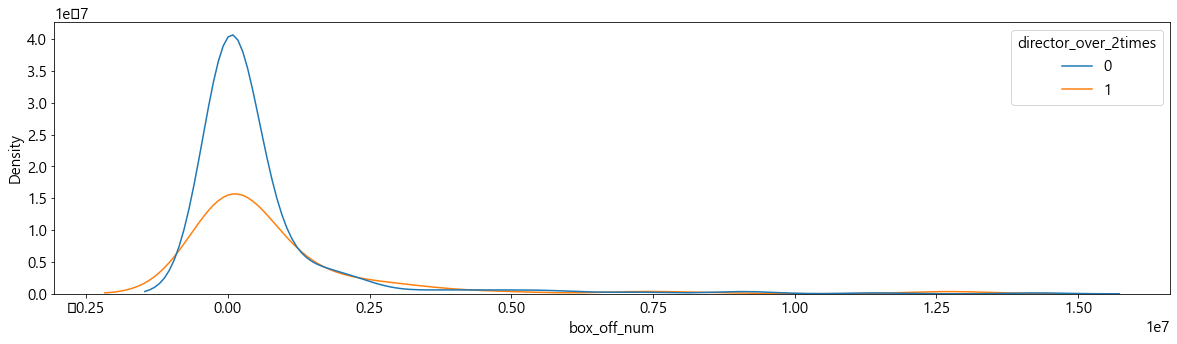

In [155]:
sns.kdeplot(x = 'box_off_num', hue = 'director_over_2times', data = data)

<AxesSubplot:xlabel='log_num', ylabel='Density'>

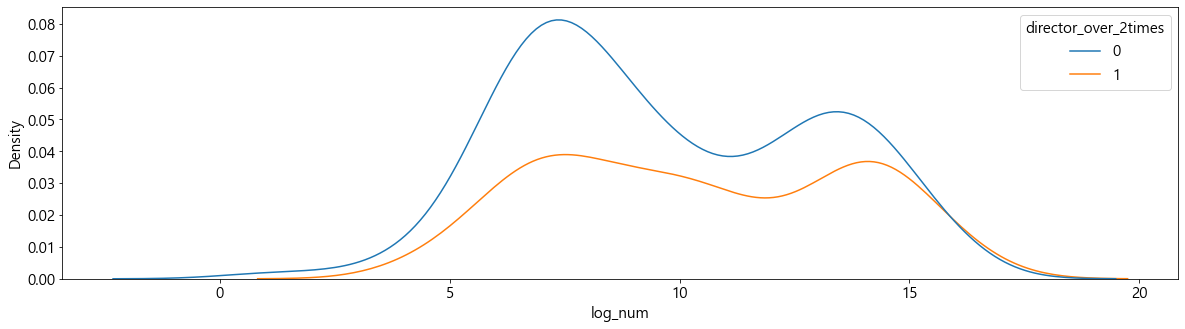

In [156]:
sns.kdeplot(x = 'log_num', hue = 'director_over_2times', data = data)

## 해당 감독의 이전 영화 수 & 평균 관객 수 

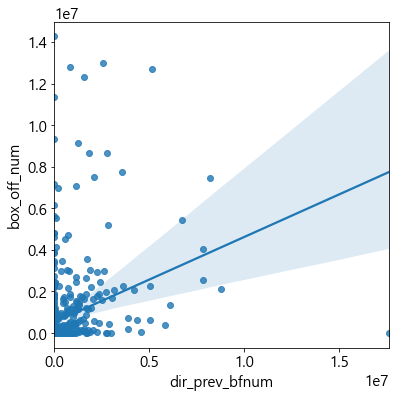

In [159]:
plt.figure(figsize = (6,6))
sns.regplot(x = 'dir_prev_bfnum', y = 'box_off_num', data = data)
plt.show()

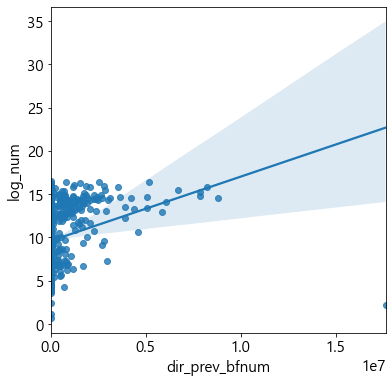

In [158]:
plt.figure(figsize = (6,6))
sns.regplot(x = 'dir_prev_bfnum', y = 'log_num', data = data)
plt.show()

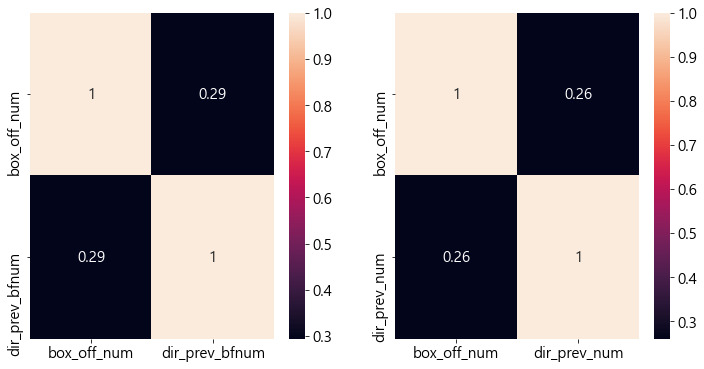

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.heatmap(data[['box_off_num', 'dir_prev_bfnum']].corr(), annot = True, ax = ax[0])
sns.heatmap(data[['box_off_num', 'dir_prev_num']].corr(), annot = True, ax = ax[1])
plt.show()

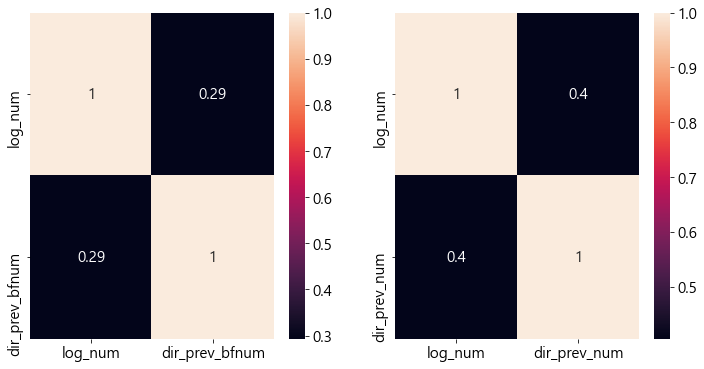

In [160]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.heatmap(data[['log_num', 'dir_prev_bfnum']].corr(), annot = True, ax = ax[0])
sns.heatmap(data[['log_num', 'dir_prev_num']].corr(), annot = True, ax = ax[1])
plt.show()

In [162]:
data['dir_prev_bfnum_log'] = np.log1p(data['dir_prev_bfnum'])
test['dir_prev_bfnum_log'] = np.log1p(test['dir_prev_bfnum'])

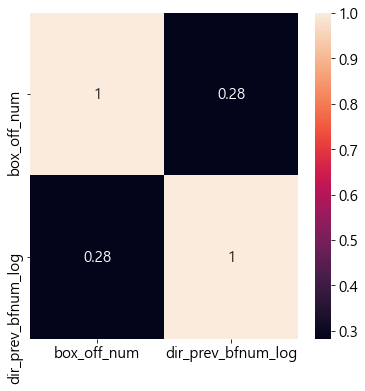

In [169]:
plt.figure(figsize = (6,6))
sns.heatmap(data[['box_off_num', 'dir_prev_bfnum_log']].corr(), annot = True)
plt.show()

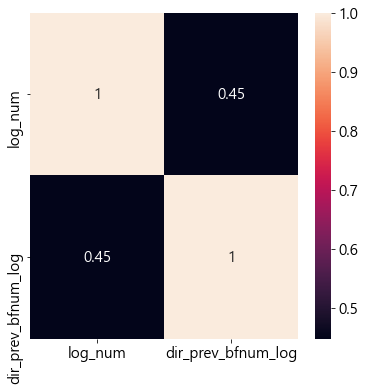

In [170]:
plt.figure(figsize = (6,6))
sns.heatmap(data[['log_num', 'dir_prev_bfnum_log']].corr(), annot = True)
plt.show()

## 스탭 수

<AxesSubplot:xlabel='num_staff', ylabel='Count'>

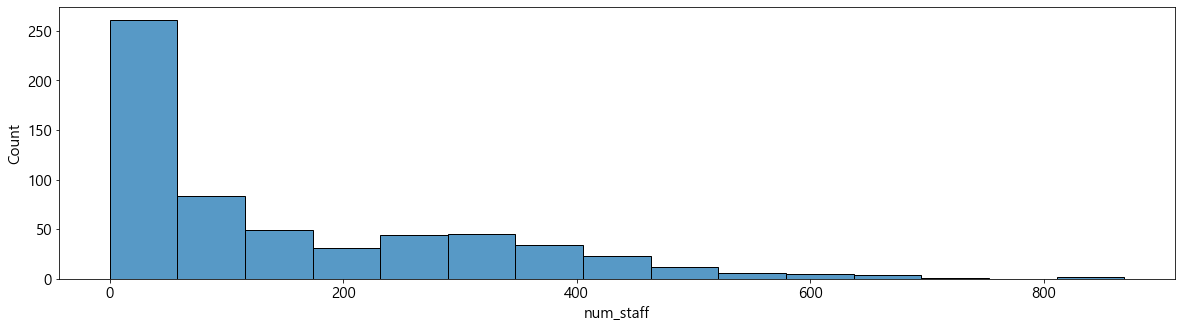

In [50]:
sns.histplot(x = 'num_staff', data = data)

In [51]:
data['num_staff'] = np.log1p(data['num_staff'])
test['num_staff'] = np.log1p(test['num_staff'])

<AxesSubplot:xlabel='num_staff', ylabel='Count'>

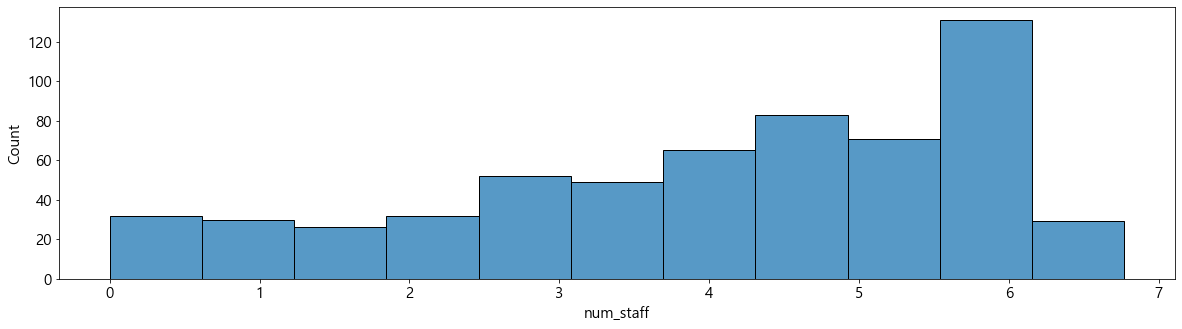

In [52]:
sns.histplot(x = 'num_staff', data = data)

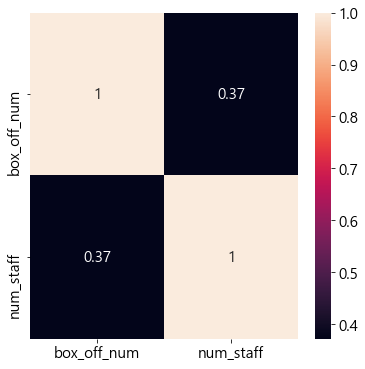

In [53]:
plt.figure(figsize = (6, 6))
sns.heatmap(data[['box_off_num', 'num_staff']].corr(), annot = True)
plt.show()

스탭 수가 많아질수록 제작비가 높은 영화이기 때문에 관객 수가 많아질 것 

## 배우 수 

<AxesSubplot:xlabel='num_actor', ylabel='Count'>

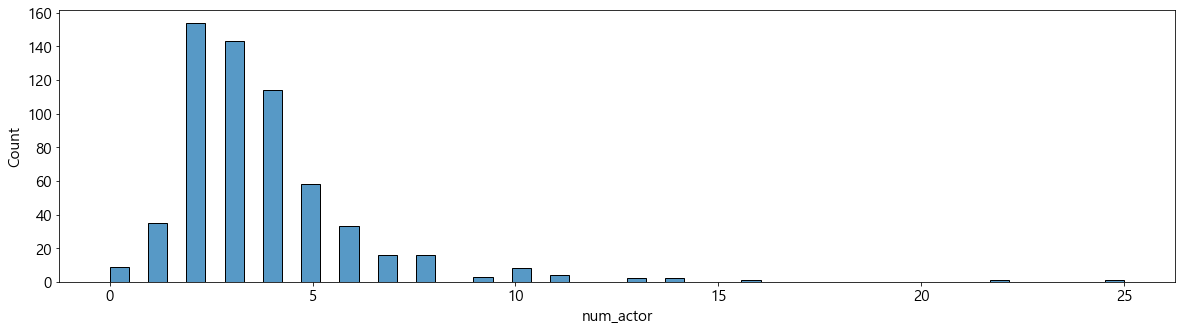

In [54]:
sns.histplot(x = 'num_actor', data = data)

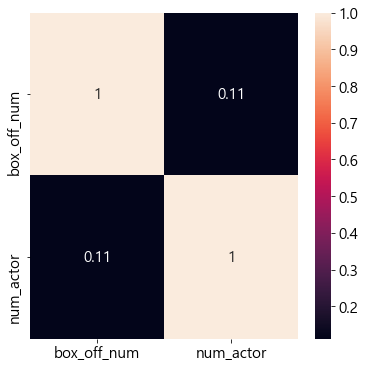

In [55]:
plt.figure(figsize = (6, 6))
sns.heatmap(data[['box_off_num', 'num_actor']].corr(), annot = True)
plt.show()

<AxesSubplot:xlabel='num_actor', ylabel='box_off_num'>

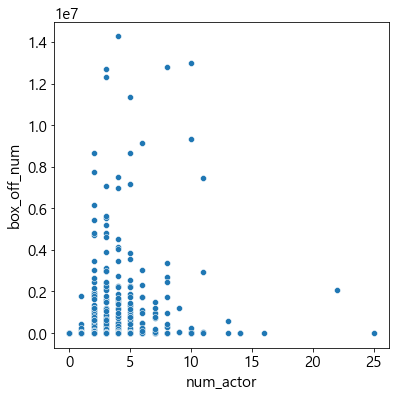

In [56]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'num_actor', y = 'box_off_num', data = data)

# train/test split

In [57]:
y_train = data['box_off_num']
select_features = ['dist_rank', 'time', 'num_staff', 'num_actor', 
                   'genre_rank', 'screening_rat']
X_train = data[select_features]
test = test[select_features]

In [58]:
X_train = pd.get_dummies(columns =['screening_rat'], data = X_train)
test = pd.get_dummies(columns =[ 'screening_rat'], data = test)

<AxesSubplot:xlabel='box_off_num', ylabel='Count'>

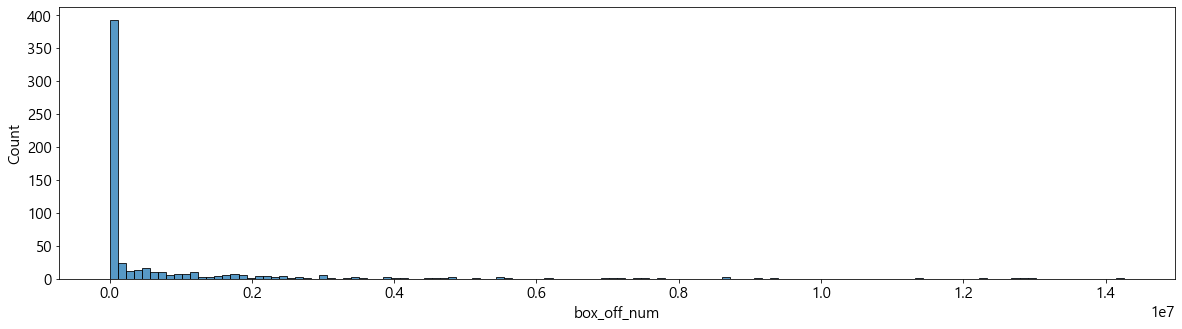

In [59]:
sns.histplot(y_train)

In [60]:
y_train = np.log1p(y_train)

<AxesSubplot:xlabel='box_off_num', ylabel='Count'>

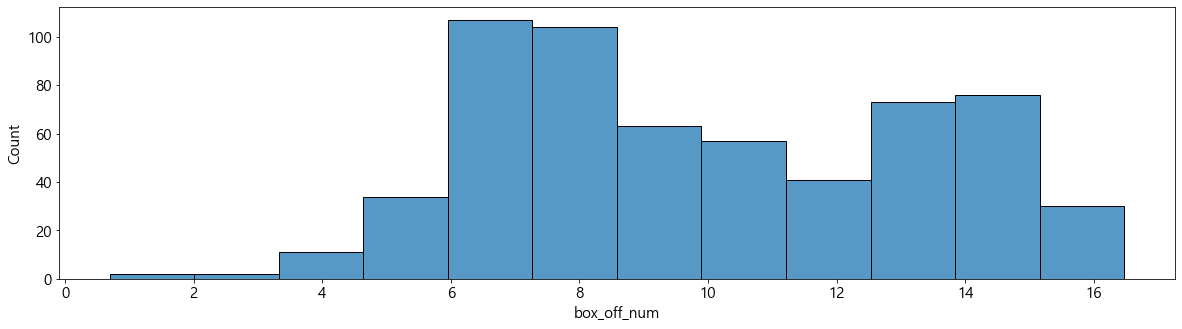

In [61]:
sns.histplot(y_train)

# model

In [62]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [63]:
kf = KFold(n_splits =  10, shuffle = True, random_state = 42)

## Gradient Boosting Regressor

In [64]:
gbm = GradientBoostingRegressor(random_state = 0)
rmse_list = []
gbm_preds = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    gbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in gbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in gbm.predict(test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    gbm_preds += (sub_pred / 10)

In [65]:
np.mean(rmse_list) # 1183312.1916131715

1183312.1916131715

## random forest

In [66]:
rf = RandomForestRegressor(random_state = 0)
rmse_list = []
rf_preds = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in rf.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in rf.predict(test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    rf_preds += (sub_pred / 10)

In [67]:
np.mean(rmse_list) # 889228.5414681748

889228.5414681748

## CatBoost

In [68]:
cb = CatBoostRegressor(random_state = 0)
rmse_list = []
cb_preds = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    cb.fit(tr_x, tr_y, silent = True)
    
    pred = np.expm1([0 if x < 0 else x for x in cb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in cb.predict(test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    cb_preds += (sub_pred / 10)

In [69]:
np.mean(rmse_list) #1095530.755100677

1095530.755100677

## XGBoost

In [70]:
xgb = XGBRegressor(random_state = 0)
rmse_list = []
xgb_preds = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in xgb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in xgb.predict(test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    xgb_preds += (sub_pred / 10)

In [71]:
np.mean(rmse_list) # 1437755.4119406561

1437755.4119406561

## LGBM

In [72]:
lgb = LGBMRegressor(random_state = 0)
rmse_list = []
lgb_preds = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    lgb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in lgb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in lgb.predict(test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    lgb_preds += (sub_pred / 10)

In [73]:
np.mean(rmse_list) # 1214039.693589237

1214039.693589237

# predict

In [74]:
submission = pd.read_csv('submission.csv')
submission['box_off_num'] = (xgb_preds + cb_preds + lgb_preds + rf_preds + gbm_preds) / 5

In [75]:
submission.sort_values(by = 'box_off_num')

,title,box_off_num
130,댄서김의 은밀한 교수법,1.453117e+01
39,REC 알이씨,1.755326e+01
139,화려한 외출,2.352633e+01
173,옹녀뎐,2.384286e+01
65,엄마는 창녀다,3.160763e+01
...,...,...
135,용의자,4.299469e+06
229,베테랑,4.485544e+06
142,박수건달,5.378980e+06
179,군도: 민란의 시대,6.399873e+06


In [76]:
submission

,title,box_off_num
0,용서는 없다,1.237701e+06
1,아빠가 여자를 좋아해,1.875215e+06
2,하모니,8.255154e+05
3,의형제,2.079874e+06
4,평행 이론,2.103890e+06
...,...,...
238,해에게서 소년에게,8.612354e+03
239,울보 권투부,3.757587e+03
240,어떤살인,1.396129e+02
241,말하지 못한 비밀,1.463318e+03


In [77]:
submission.to_csv('sub5.csv',index = False)

In [78]:
submission = pd.read_csv('submission.csv')
submission['box_off_num'] = rf_preds
submission.to_csv('sub0522_1.csv',index = False)